In [15]:
%matplotlib notebook
%matplotlib notebook

import os 
import umap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import natsort as n

from ipywidgets import *


import preproc as proc
import settings as s

from sklearn.manifold import TSNE


paths = s.paths()
params = s.params()

In [16]:
path = 'Latent_20_bigkernel'

all_latent = np.array([np.load(os.path.join(path, s)) for s in n.natsorted(os.listdir(path))]).reshape(len(os.listdir(path)), 100)
filenames = n.natsorted(os.listdir(path))
    

In [17]:
# Define color scales depending on task
cmap = matplotlib.cm.get_cmap('hsv')
colors = [cmap(0.1)]*24 + [cmap(0.3)]*16 + [cmap(1)] + [cmap(0.5)]*16 + [cmap(0.7)]*5

<IPython.core.display.Javascript object>


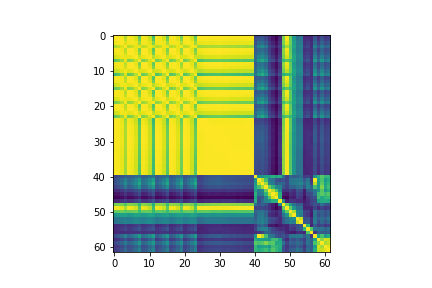

In [18]:
# Draw simple correlation matrix between vectors
corr_matrix = proc.correlation_matrix(all_latent)
plt.imshow(corr_matrix)
plt.savefig('corr_matrix.png')

plt.show()

<IPython.core.display.Javascript object>


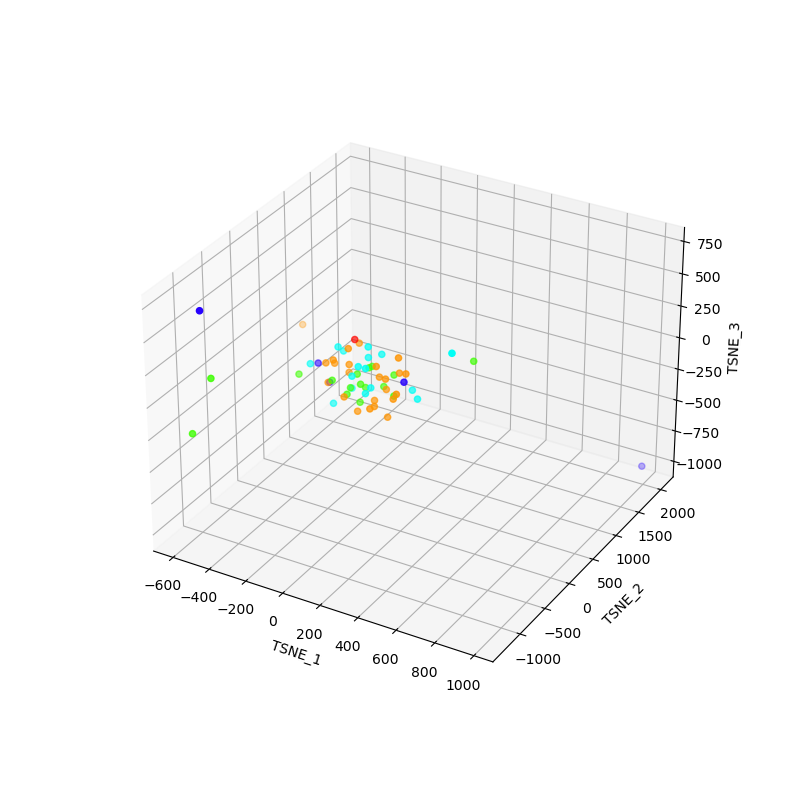

In [19]:
# Plot latent representation in TSNE space
fig = plt.figure(figsize=(8, 8), dpi=100)
ax = fig.add_subplot(projection='3d')


clf = TSNE(n_components=3, perplexity=20)
Y = clf.fit_transform(all_latent)
plot = ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=colors)
ax.set_xlabel('TSNE_1')
ax.set_ylabel('TSNE_2')
ax.set_zlabel('TSNE_3')

plt.savefig('Output/TSNE/tsne.png')
plt.show()

<IPython.core.display.Javascript object>


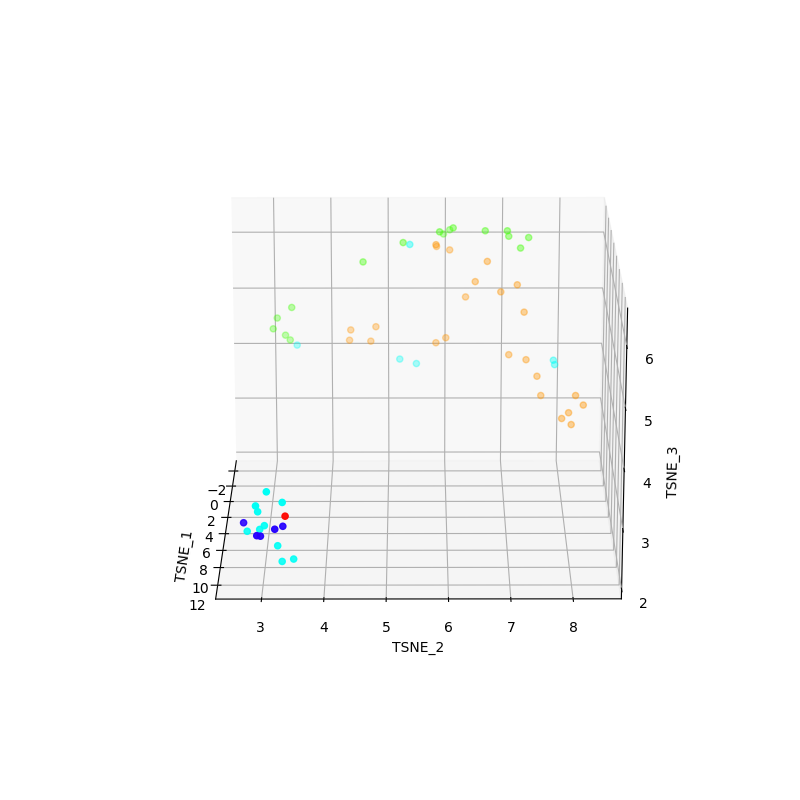

In [20]:
# Plot latent representation in UMAP space
fig = plt.figure(figsize=(8, 8), dpi=100)
ax = fig.add_subplot(projection='3d')

clf = umap.UMAP(n_components=3, n_neighbors=6)
Y = clf.fit_transform(all_latent)

ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=colors)
ax.set_xlabel('TSNE_1')
ax.set_ylabel('TSNE_2')
ax.set_zlabel('TSNE_3')

plt.savefig('Output/TSNE/tsne.png')
plt.show()

<IPython.core.display.Javascript object>


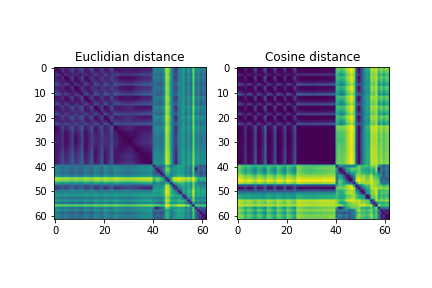

AMN_20Hz_1500ms_70dB_noise_45dB
AMN_20Hz_1500ms_70dB_noise_50dB
AMN_20Hz_1500ms_70dB_noise_55dB
AMN_20Hz_1500ms_70dB_noise_60dB
AMN_31Hz_1500ms_70dB_noise_45dB
AMN_31Hz_1500ms_70dB_noise_50dB
AMN_31Hz_1500ms_70dB_noise_55dB
AMN_31Hz_1500ms_70dB_noise_60dB
AMN_50Hz_1500ms_70dB_noise_45dB
AMN_50Hz_1500ms_70dB_noise_50dB
AMN_50Hz_1500ms_70dB_noise_55dB
AMN_50Hz_1500ms_70dB_noise_60dB
AMN_79Hz_1500ms_70dB_noise_45dB
AMN_79Hz_1500ms_70dB_noise_50dB
AMN_79Hz_1500ms_70dB_noise_55dB
AMN_79Hz_1500ms_70dB_noise_60dB
AMN_126Hz_1500ms_70dB_noise_45dB
AMN_126Hz_1500ms_70dB_noise_50dB
AMN_126Hz_1500ms_70dB_noise_55dB
AMN_126Hz_1500ms_70dB_noise_60dB
AMN_200Hz_1500ms_70dB_noise_45dB
AMN_200Hz_1500ms_70dB_noise_50dB
AMN_200Hz_1500ms_70dB_noise_55dB
AMN_200Hz_1500ms_70dB_noise_60dB
AM_20Hz_1500ms_70dB
AM_23Hz_1500ms_70dB
AM_27Hz_1500ms_70dB
AM_31Hz_1500ms_70dB
AM_36Hz_1500ms_70dB
AM_43Hz_1500ms_70dB
AM_50Hz_1500ms_70dB
AM_58Hz_1500ms_70dB
AM_68Hz_1500ms_70dB
AM_79Hz_1500ms_70dB
AM_92Hz_1500ms_70dB
AM_1

In [21]:
# Compute euclidian distance between stimulus
fig, axs = plt.subplots(1, 2)

euclidian_distance_matrix = np.array([proc.euclidian_distance(a, b) for a in all_latent for b in all_latent]).reshape(62, 62)
cosine_distance_matrix = np.array([proc.cosine_distance(a, b) for a in all_latent for b in all_latent]).reshape(62, 62)

axs[0].imshow(euclidian_distance_matrix)
axs[1].imshow(cosine_distance_matrix)

axs[0].set_title('Euclidian distance')
axs[1].set_title('Cosine distance')

plt.savefig('corr_matrix.png')

plt.show()
for f in filenames:
    print(f[:-4])